# `→ Implementation:`

`The Problem Statement:` To build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

`Understanding the Dataset:` This dataset has been downloaded from Kaggel, [Link to Download the Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).
The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# `Importing the Necessary Libraries:`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Import necessary libraries for hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# `Loading the Data:` 

In [7]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# `Feature Engineering`

## `Exploratory Data Analysis(EDA)`

### 1. Basic Data Inspection

In [9]:
print("Data Inspection:\n")
print(df.info())  # Data Inspection Strategy
print("\nSummary Statistics:\n")
print(df.describe())  # Summary Statistics

Data Inspection:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1054

### 2. Data Types & Non-null Counts

In [10]:
print("\nData Types:\n")
print(df.dtypes)
print('\nNon-null Counts:\n')
print(df.isnull().sum())


Data Types:

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Non-null Counts:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 3. Missing Values Analysis

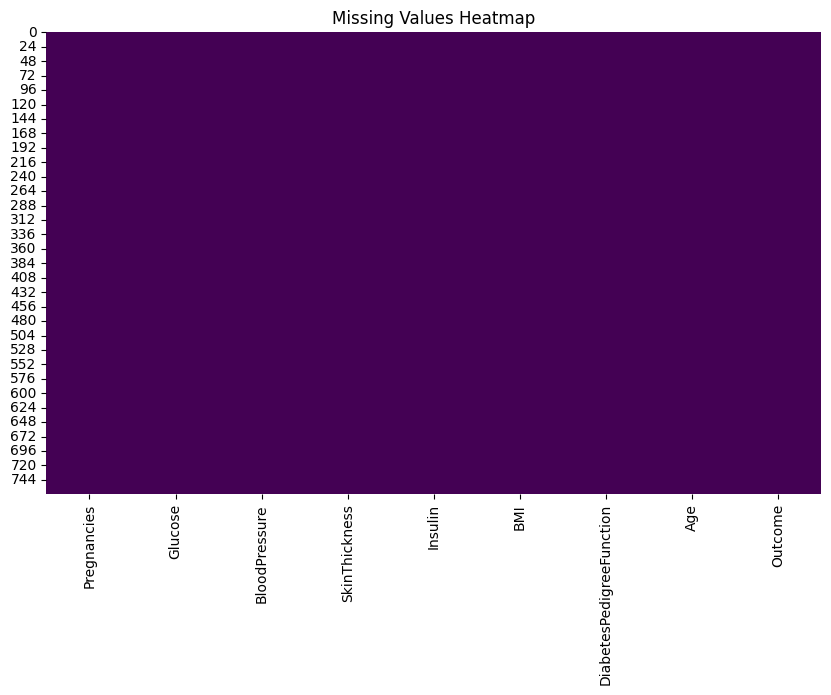

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

`<b>Insight:</b>` The dataset has no missing values, because there is no 'Yellow' color bands in the graph.

### 4. Uni-variate Analysis

* Numerical Data Analysis
* Categorical Data Analysis

#### Numerical Data Analysis

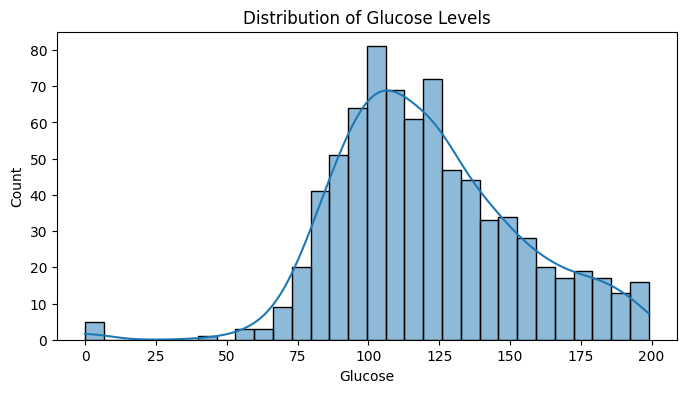

In [14]:
# Histogram -> Glucose Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()

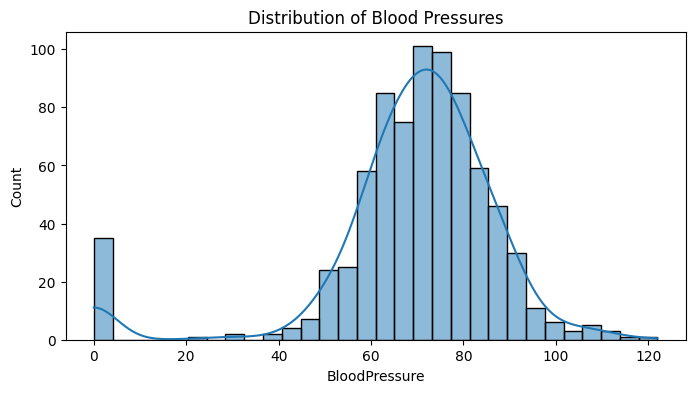

In [16]:
# Histogram -> Blood Pressure Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['BloodPressure'], bins=30, kde=True)
plt.title('Distribution of Blood Pressures')
plt.show()

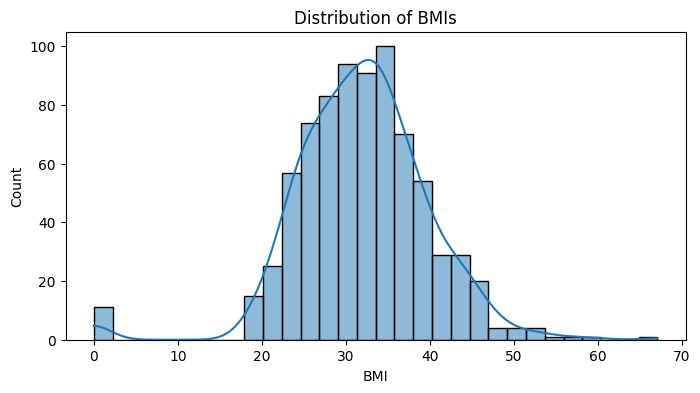

In [18]:
# Histogram -> BMI Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMIs')
plt.show()

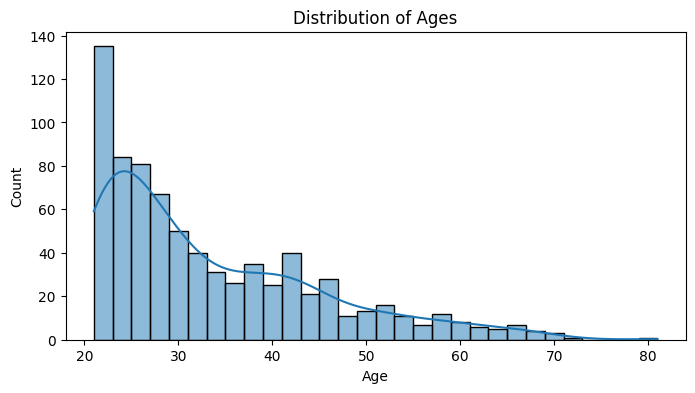

In [20]:
# Histogram -> Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.show()

#### Categorical Data Analysis

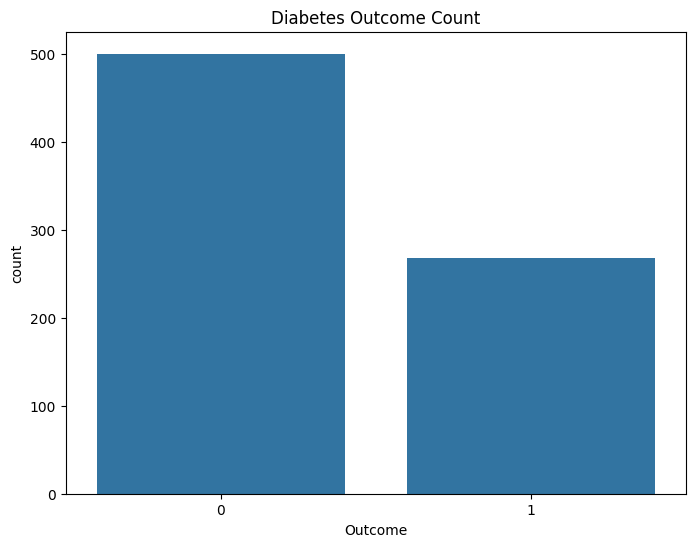

In [21]:
# Categorical: Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.show()

### 5. Bi-variate Analysis
* Numerical vs Numerical
* Categorical vs Categorical
* Categorical vs Numerical

#### Numerical vs Numerical

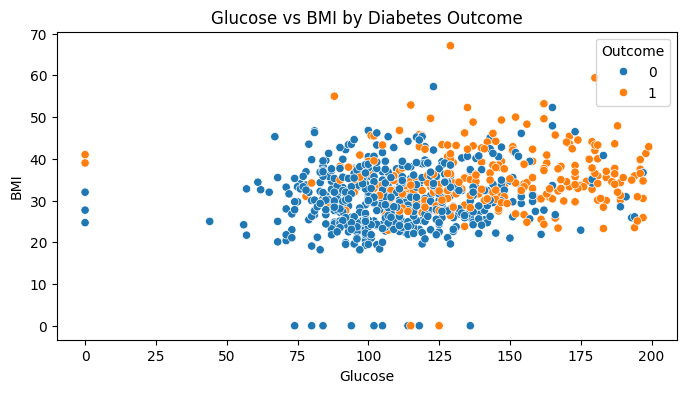

In [22]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.show()

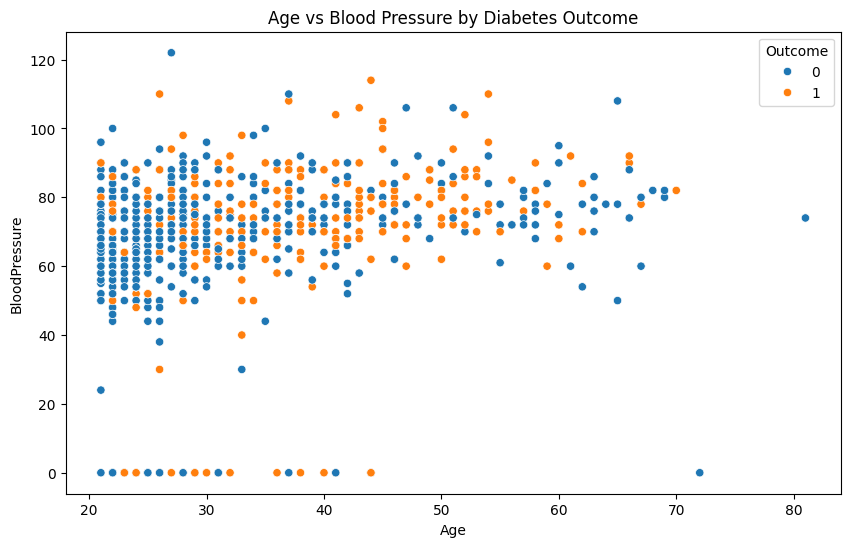

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BloodPressure', hue='Outcome', data=df)
plt.title('Age vs Blood Pressure by Diabetes Outcome')
plt.show()

#### Categorical vs Numerical

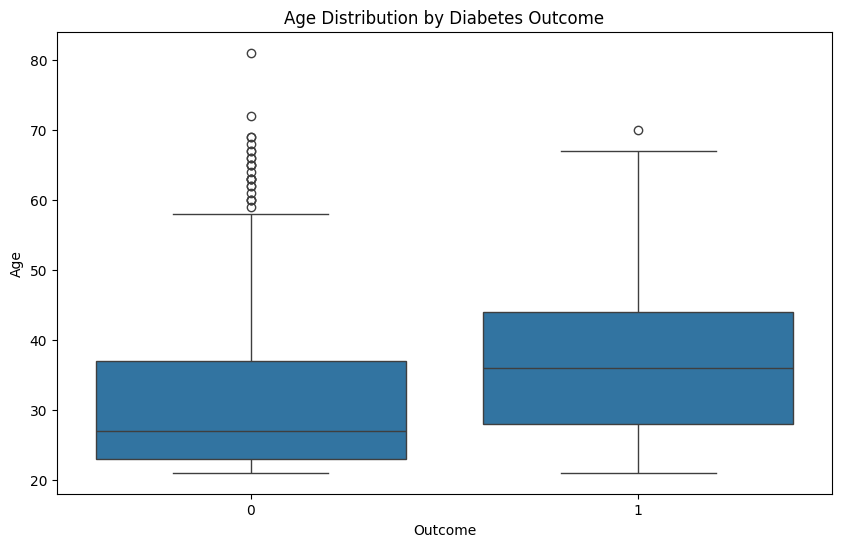

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

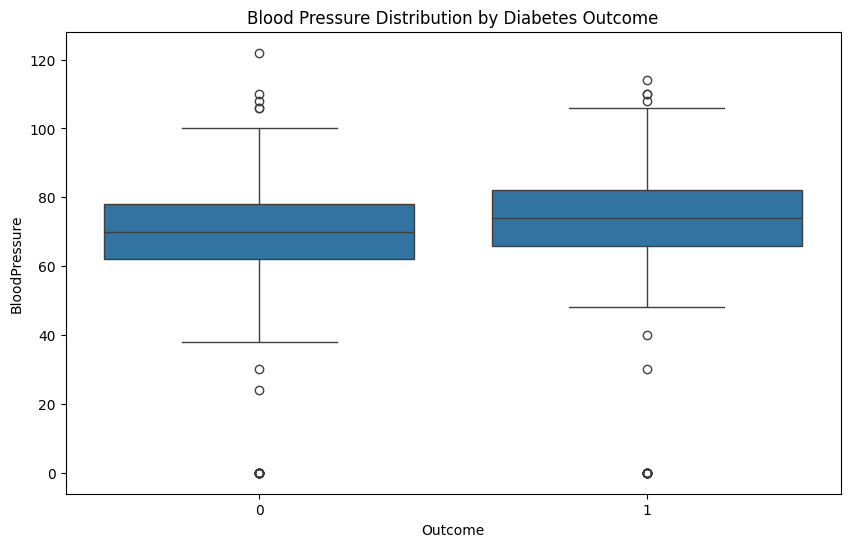

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Blood Pressure Distribution by Diabetes Outcome')
plt.show()

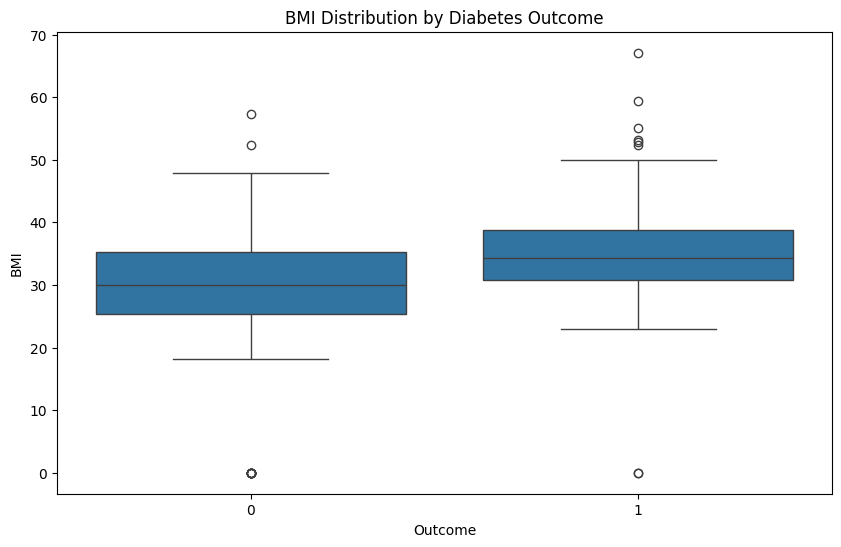

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

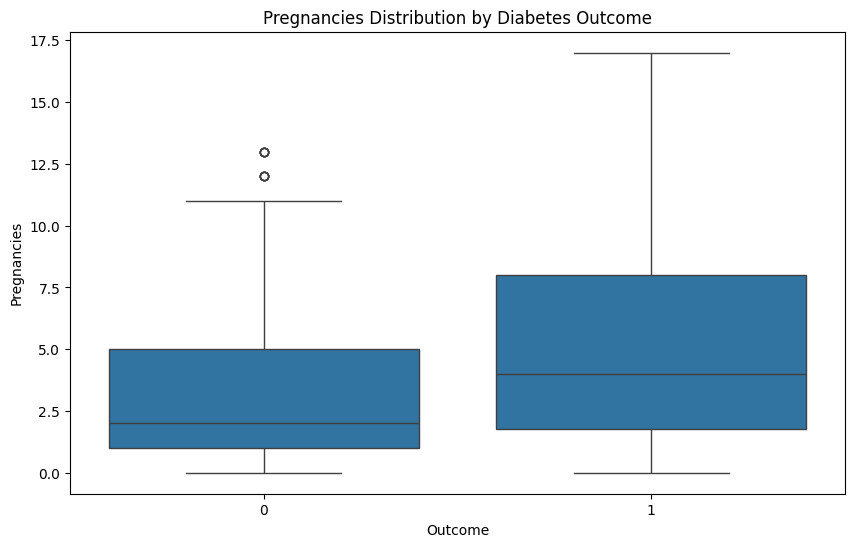

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Pregnancies Distribution by Diabetes Outcome')
plt.show()

### 6. Multi-variate Analysis
* Correlation Heatmap
* Pairplot

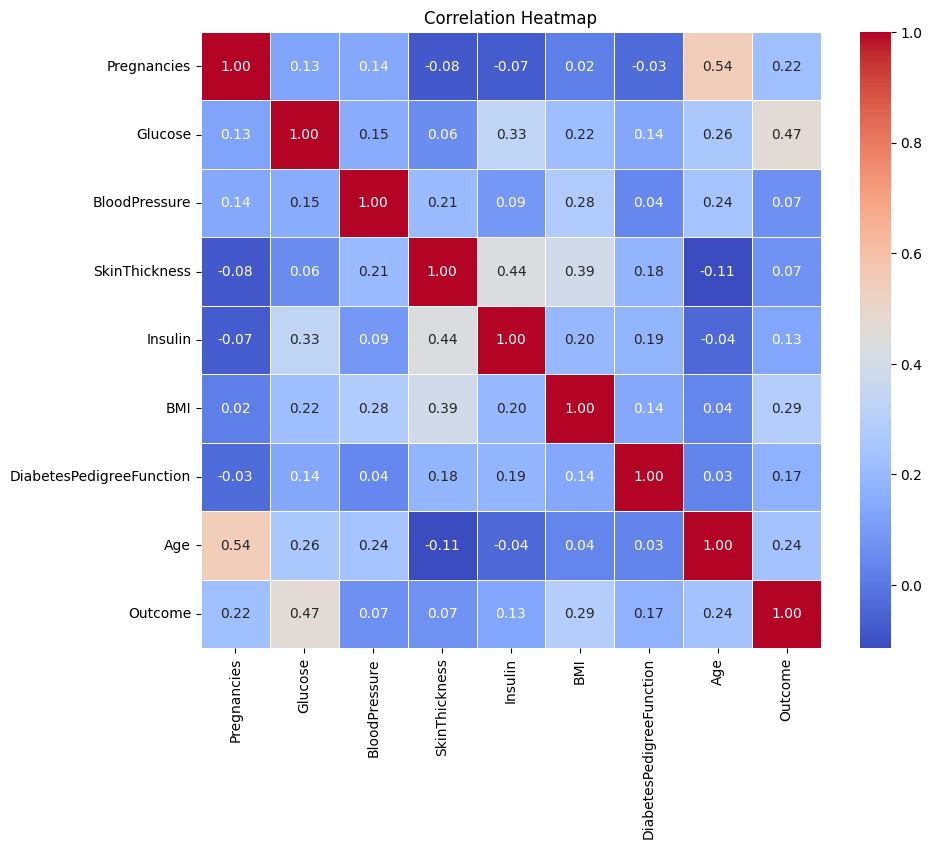

In [29]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

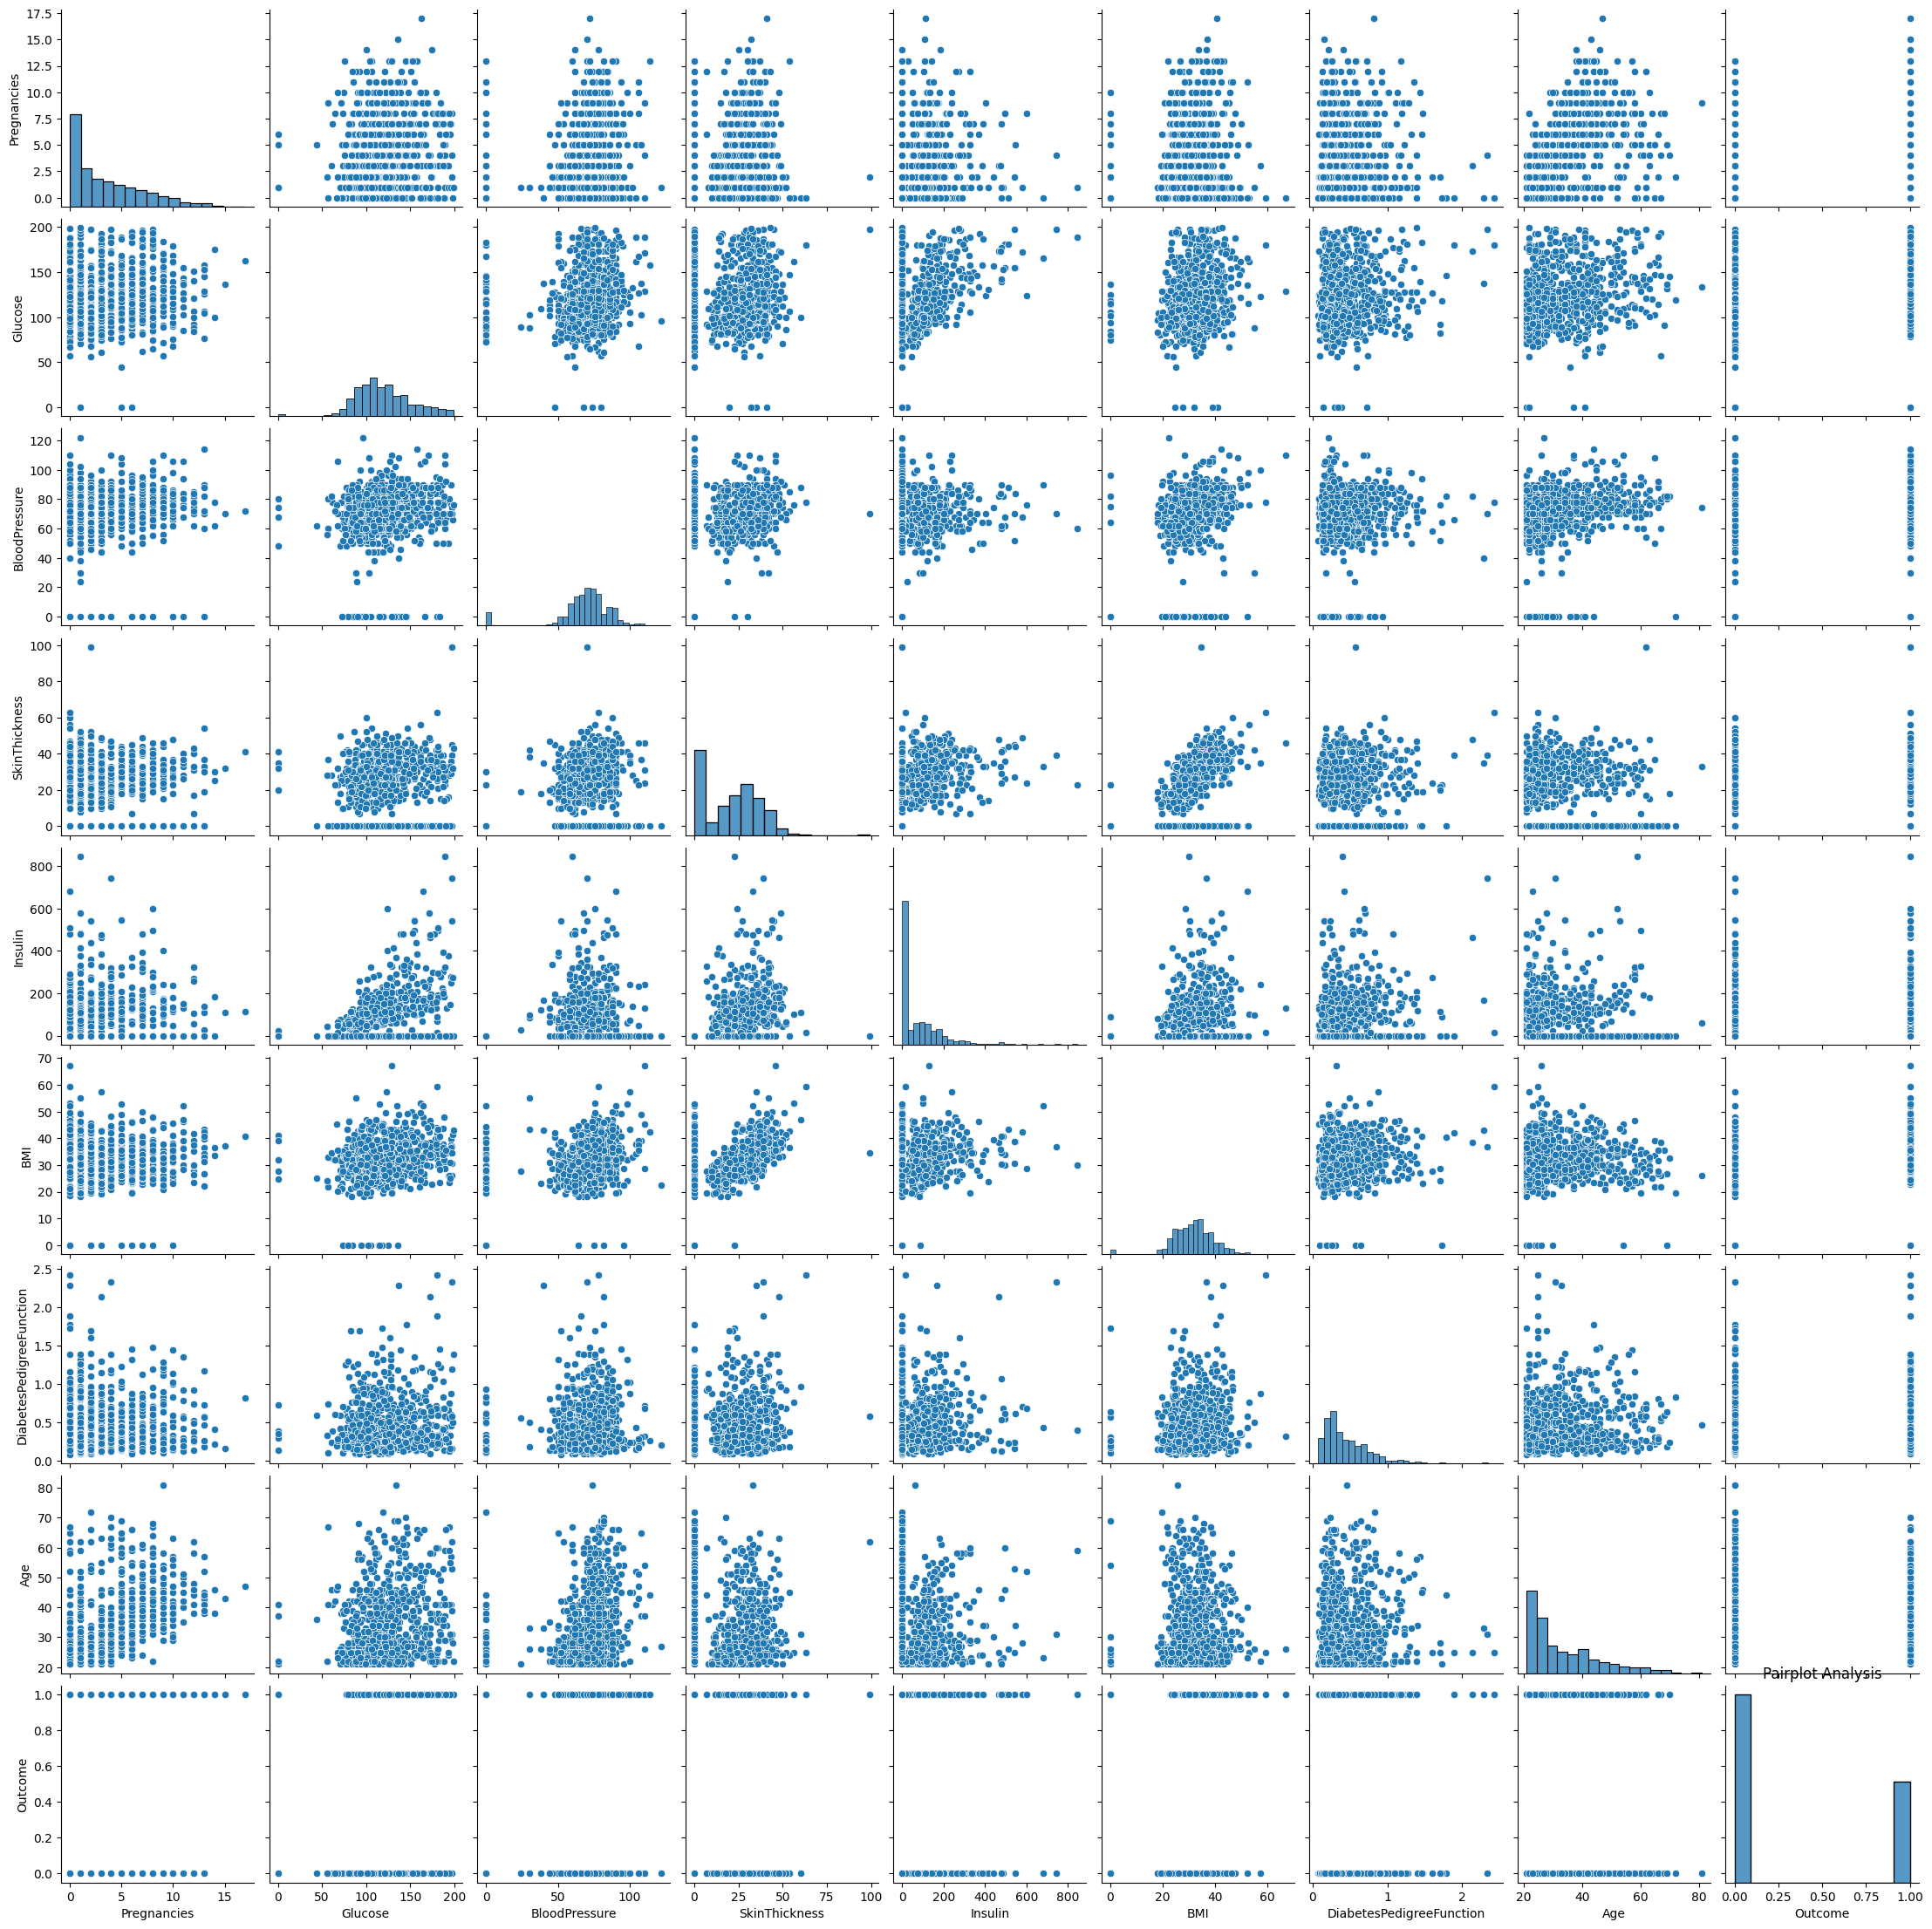

In [30]:
sns.pairplot(df)
plt.title('Pairplot Analysis')
plt.show()

## `Feature Selection`

In [34]:
df_new = df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age','Outcome']]
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


## `Outlier Detection  & Handling`
* Z-Score Outlier Detection
* IQR Outlier Detection

In [35]:
z_scores = np.abs(stats.zscore(df))
outliers_z = (z_scores > 3).any(axis=1)
print(f"Number of Outliers detected using Z-score: {np.sum(outliers_z)}")

Number of Outliers detected using Z-score: 80


In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of Outliers detected using IQR: {np.sum(outliers_iqr)}")

Number of Outliers detected using IQR: 129


In [37]:
# Handling Outliers
# For simplicity, let's remove the  IQR based outliers
df_no_outliers = df[~outliers_iqr]
df_no_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## `Standard Scaling`

In [39]:
scaler = StandardScaler()
scaled_columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']
df_no_outliers[scaled_columns] = scaler.fit_transform(df_no_outliers[scaled_columns])
df_no_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.627,1.561132,1
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,0.351,-0.154912,0
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.672,-0.064594,1
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,0.167,-1.058093,0
5,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,0.201,-0.245230,0
...,...,...,...,...,...,...,...,...,...
763,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,0.171,2.735268,0
764,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,0.340,-0.516184,0
765,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,0.245,-0.245230,0
766,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,0.349,1.290178,1


# `Modeling`

## 1. Data Splitting

In [41]:
# Defining features (X) and target (y)
X = df_no_outliers.drop(columns=['Outcome'])
y = df_no_outliers['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## 2. Model Evaluation
* Confusion Matrix
* Classification Report - Precision, Accuracy, F1-score, and Recall
* RSE & RMSE
* ROC Curve & AUC

Confusion Matrix:

[[87  5]
 [18 18]]
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        92
           1       0.78      0.50      0.61        36

    accuracy                           0.82       128
   macro avg       0.81      0.72      0.75       128
weighted avg       0.82      0.82      0.81       128

ROC AUC Score:
 0.8499


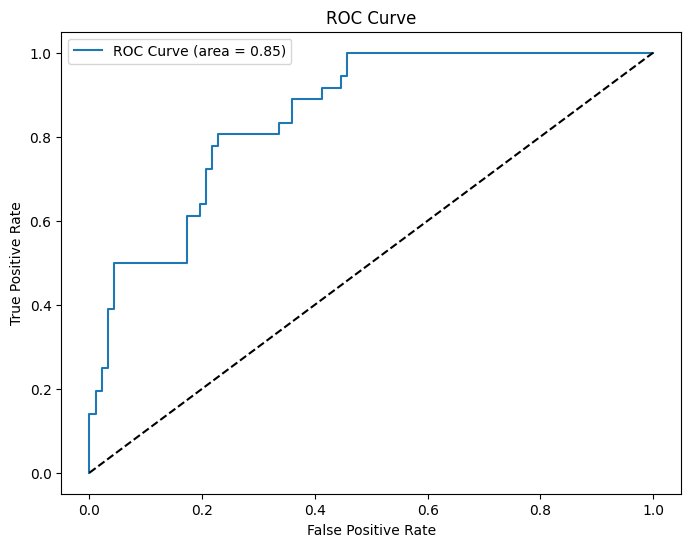

In [42]:
# Predictions
y_pred = log_reg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

# Precision, Accuracy, and Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# R-squared and RMSE
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score:\n {roc_auc:.4f}")

# AUC and ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3. Improving Model Performance

### a). Hyperparameter Tuning with GridSearchCV

In [47]:
# Tuning hyperparameters for Logistic Regression (L2 Regularization - Ridge)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 50, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers for logistic regression
    'penalty': ['l2','l1'],  # Regularization type
    'class_weight': ['balanced', None],  # Class weights for imbalanced datasets
    'n_jobs': [-1],
    'max_iter': [200, 500, 1000, 5000, 10000, 20000]
}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=100, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

print(f"Best Hyperparameters for Logistic Regression: {log_reg_grid.best_params_}")
print(f"Best Accuracy from Logistic Regression: {log_reg_grid.best_score_}")

Best Hyperparameters for Logistic Regression: {'C': 100, 'class_weight': None, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy from Logistic Regression: 0.7783333333333331


Again Evaluating the with the Best Params

Confusion Matrix:

[[88  4]
 [18 18]]
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        92
           1       0.82      0.50      0.62        36

    accuracy                           0.83       128
   macro avg       0.82      0.73      0.75       128
weighted avg       0.83      0.83      0.81       128

ROC AUC Score:
 0.8499


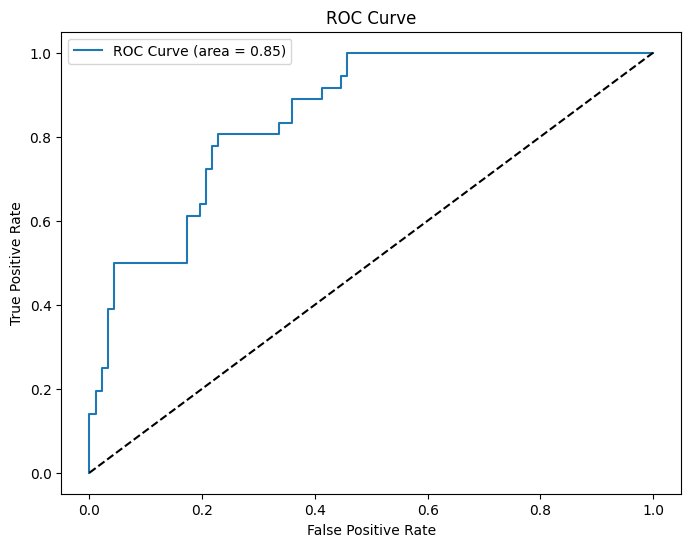

In [48]:
# Predictions
y_pred = log_reg_grid.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

# Precision, Accuracy, and Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# R-squared and RMSE
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score:\n {roc_auc:.4f}")

# AUC and ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### b). Cross-Validation

In [61]:
# Perform K-fold cross-validation with Logistic Regression
log_reg_cross = LogisticRegression(C = 100, class_weight = None, max_iter = 200, n_jobs = -1, penalty= 'l1', solver =  'liblinear')
cross_val_scores = cross_val_score(log_reg_cross, X_train, y_train, cv=50, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

Cross-Validation Accuracy: 0.7807


### c.) Ensemble Method - Stacking

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42))
]

# Stacking model with Logistic Regression with best Params as the meta-learner
stacking_clf = StackingClassifier(
    estimators=base_estimators, 
    final_estimator=log_reg_grid
)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

Stacking Model Accuracy: 0.7578


Confusion Matrix:

[[89  3]
 [28  8]]
Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        92
           1       0.73      0.22      0.34        36

    accuracy                           0.76       128
   macro avg       0.74      0.59      0.60       128
weighted avg       0.75      0.76      0.71       128

ROC AUC Score:
 0.8708


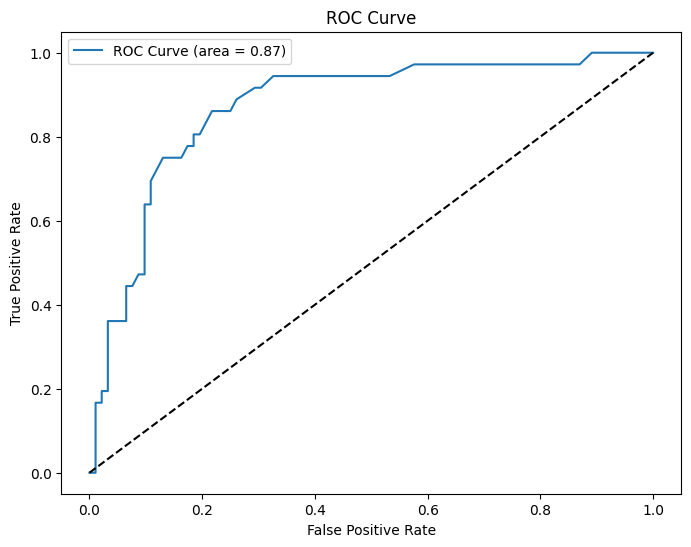

In [64]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

# Precision, Accuracy, and Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# R-squared and RMSE
y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score:\n {roc_auc:.4f}")

# AUC and ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()